In [1]:
import pandas as pd
import numpy as np

In [5]:
data_frame = pd.read_parquet('./dataset/relevance_challenge_valid.parquet')

In [6]:
data_frame.head(5)

,text,coordinates,label,raw_prediction,confidence,distance
246274,i'm at jalboot village in al ahmadi https://t....,"[47.78220261841334, 28.796369578665622]",1478,"[-0.16533367, 5.490072, -0.07687697, -0.028137...",0.097776,413.620188
19954,just posted a photo @ fringes https://t.co/ma1...,"[-114.60882437411358, 51.21439841204866]",469,"[-2.382054, -0.10486849, 0.36622486, -0.755341...",0.158510,7096.152333
4850,"ok, cleveland. here's the plan.\n\nwe need you...","[-75.0323028333211, 39.476737451506004]",385,"[-2.481499, -2.6620083, -0.20655325, -0.289278...",0.175566,607.165365
108015,@maisamo15677972 esgotada,"[-46.45847010250085, -5.46301167598722]",2323,"[3.0630562, -1.9455369, -1.4932183, -1.8799204...",0.015767,1200.366641
278357,@mzfrancesfx @moore10112 perfect date night!!,"[-91.9513874234886, 42.12479709049989]",682,"[-2.7112045, -2.0834854, 0.080568545, -0.49260...",0.010079,6900.667485


In [7]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55350 entries, 246274 to 45421
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   text            55350 non-null  object 
 1   coordinates     55350 non-null  object 
 2   label           55350 non-null  int64  
 3   raw_prediction  55350 non-null  object 
 4   confidence      55350 non-null  float64
 5   distance        55350 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.0+ MB


In [8]:
def softmax(x):
    # Compute the exponential values for each element in the input array
    exps = np.exp(x - np.max(x))

    # Compute the softmax values by dividing the exponential of each element by the sum of exponentials
    return exps / np.sum(exps)  

In [6]:
max_confidences = []

In [7]:
data_frame.head(5)

,text,coordinates,label,raw_prediction,confidence,distance
246274,i'm at jalboot village in al ahmadi https://t....,"[47.78220261841334, 28.796369578665622]",1478,"[-0.16533367, 5.490072, -0.07687697, -0.028137...",0.097776,413.620188
19954,just posted a photo @ fringes https://t.co/ma1...,"[-114.60882437411358, 51.21439841204866]",469,"[-2.382054, -0.10486849, 0.36622486, -0.755341...",0.158510,7096.152333
4850,"ok, cleveland. here's the plan.\n\nwe need you...","[-75.0323028333211, 39.476737451506004]",385,"[-2.481499, -2.6620083, -0.20655325, -0.289278...",0.175566,607.165365
108015,@maisamo15677972 esgotada,"[-46.45847010250085, -5.46301167598722]",2323,"[3.0630562, -1.9455369, -1.4932183, -1.8799204...",0.015767,1200.366641
278357,@mzfrancesfx @moore10112 perfect date night!!,"[-91.9513874234886, 42.12479709049989]",682,"[-2.7112045, -2.0834854, 0.080568545, -0.49260...",0.010079,6900.667485


In [9]:
data_frame = data_frame[['raw_prediction','distance']]

In [10]:
data_frame.head(5)

,raw_prediction,distance
246274,"[-0.16533367, 5.490072, -0.07687697, -0.028137...",413.620188
19954,"[-2.382054, -0.10486849, 0.36622486, -0.755341...",7096.152333
4850,"[-2.481499, -2.6620083, -0.20655325, -0.289278...",607.165365
108015,"[3.0630562, -1.9455369, -1.4932183, -1.8799204...",1200.366641
278357,"[-2.7112045, -2.0834854, 0.080568545, -0.49260...",6900.667485


In [11]:
data_frame.rename(columns={'raw_prediction': 'features'}, inplace=True)

In [12]:
data_frame.rename(columns={'distance': 'label'}, inplace=True)

In [13]:
data_frame.head(5)

,features,label
246274,"[-0.16533367, 5.490072, -0.07687697, -0.028137...",413.620188
19954,"[-2.382054, -0.10486849, 0.36622486, -0.755341...",7096.152333
4850,"[-2.481499, -2.6620083, -0.20655325, -0.289278...",607.165365
108015,"[3.0630562, -1.9455369, -1.4932183, -1.8799204...",1200.366641
278357,"[-2.7112045, -2.0834854, 0.080568545, -0.49260...",6900.667485


In [14]:
data_frame['confidence'] = data_frame['features'].apply(lambda x: softmax(x))

In [14]:
from sklearn.cluster import DBSCAN

In [15]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [16]:
pd.DataFrame(data_frame['confidence'].iloc[0]).describe()

,0
count,3000.000000
mean,0.000333
std,0.003500
min,0.000003
25%,0.000017
50%,0.000024
75%,0.000036
max,0.097776


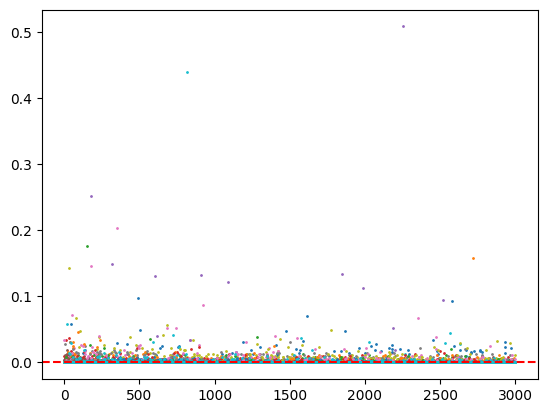

In [17]:
import matplotlib.pyplot as plt

n_rows = 30
fig, ax = plt.subplots(sharex=True, sharey=True)

ax.axhline(y=0.00033, color='red', linestyle='--')
for j in range(n_rows):
    y_values = data_frame['confidence'].iloc[j]
    x_values = range(len(y_values))
    ax.scatter(x_values, y_values, s=1, alpha=1)

plt.show()

In [18]:
data_frame['max_confidence'] = data_frame['confidence'].apply(lambda x: np.max(x))

In [19]:
data_frame = data_frame.sort_values(by='max_confidence', ascending=False)

In [20]:
top_records_count = int(0.1 * len(data_frame))
data_frame_filtered = data_frame.iloc[:top_records_count]

In [21]:
data_frame_filtered = data_frame_filtered.sort_values(by='label', ascending=False)

In [22]:
data_frame_filtered.head(5)

,features,label,confidence,max_confidence
432912,"[-2.289408, -2.863417, -0.24333838, -1.4362493...",18696.361648,"[0.0001466629, 8.260976e-05, 0.0011347934, 0.0...",0.235032
408855,"[-2.6384645, -1.6681372, -1.2293004, -0.904867...",17147.333877,"[1.5679982e-05, 4.137647e-05, 6.417087e-05, 8....",0.611516
480793,"[-0.90661466, -0.5528418, 0.052495733, 0.52641...",16868.894554,"[2.7771644e-05, 3.9558778e-05, 7.24666e-05, 0....",0.435774
112417,"[-2.881119, -2.3009555, -1.675966, -0.77146775...",16711.752387,"[6.890906e-06, 1.2309429e-05, 2.2996799e-05, 5...",0.661136
480058,"[-0.3312797, -1.2622576, -0.07300368, 0.852981...",16536.855682,"[8.729903e-05, 3.441049e-05, 0.0001130257, 0.0...",0.245272


IndexError: index 33 is out of bounds for axis 0 with size 33

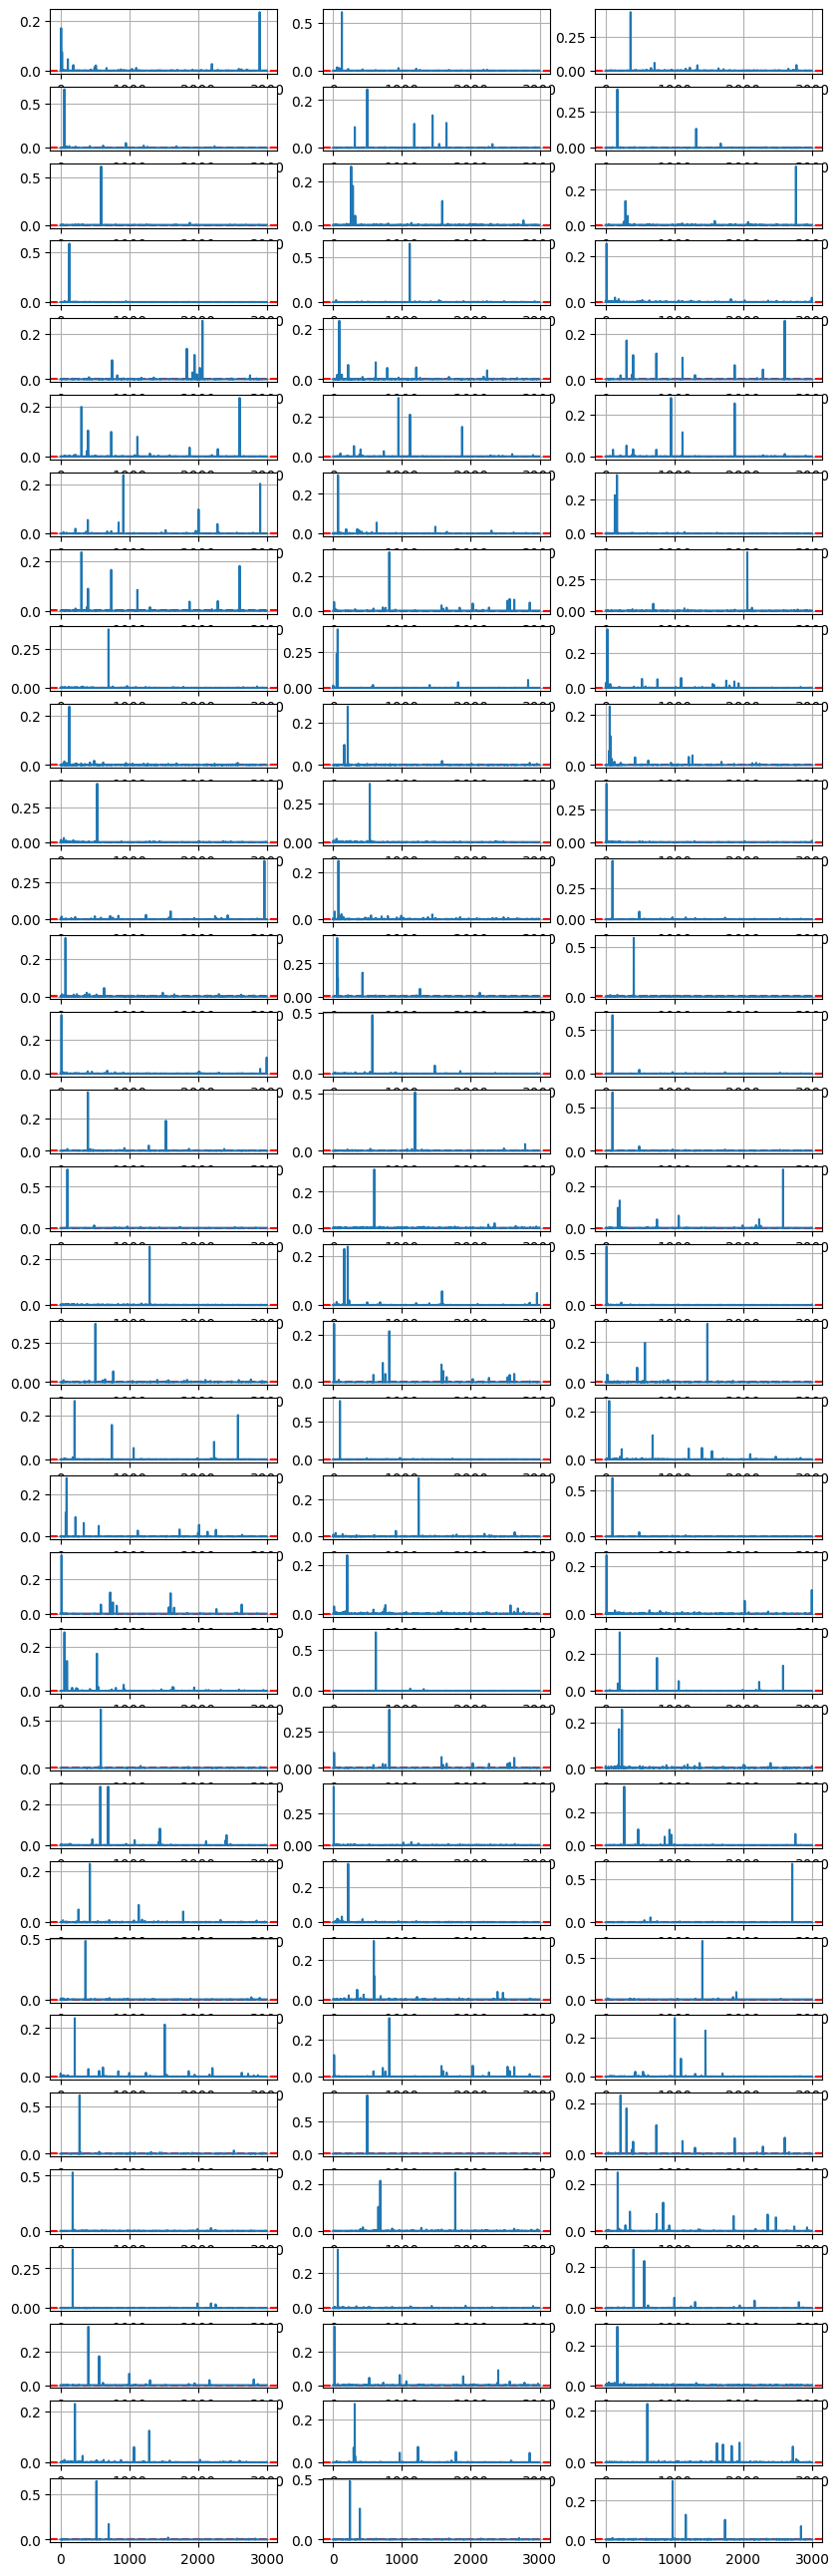

In [23]:
n_rows = 100  # Adjust the number of rows as needed
n_cols = 3
fig, axes = plt.subplots(n_rows // n_cols, n_cols, figsize=(10, 1 * (n_rows // n_cols)))

c = 0.00033

for j in range(n_rows):
    y_values = data_frame_filtered['confidence'].iloc[j]
    x_values = range(len(y_values))
    
    row = j // n_cols  
    col = j % n_cols   
    
    ax = axes[row, col]  # Get the current subplot
    ax.axhline(y=c, color='red', linestyle='--')
    ax.plot(x_values, y_values)
    ax.grid()

plt.show()


IndexError: index 33 is out of bounds for axis 0 with size 33

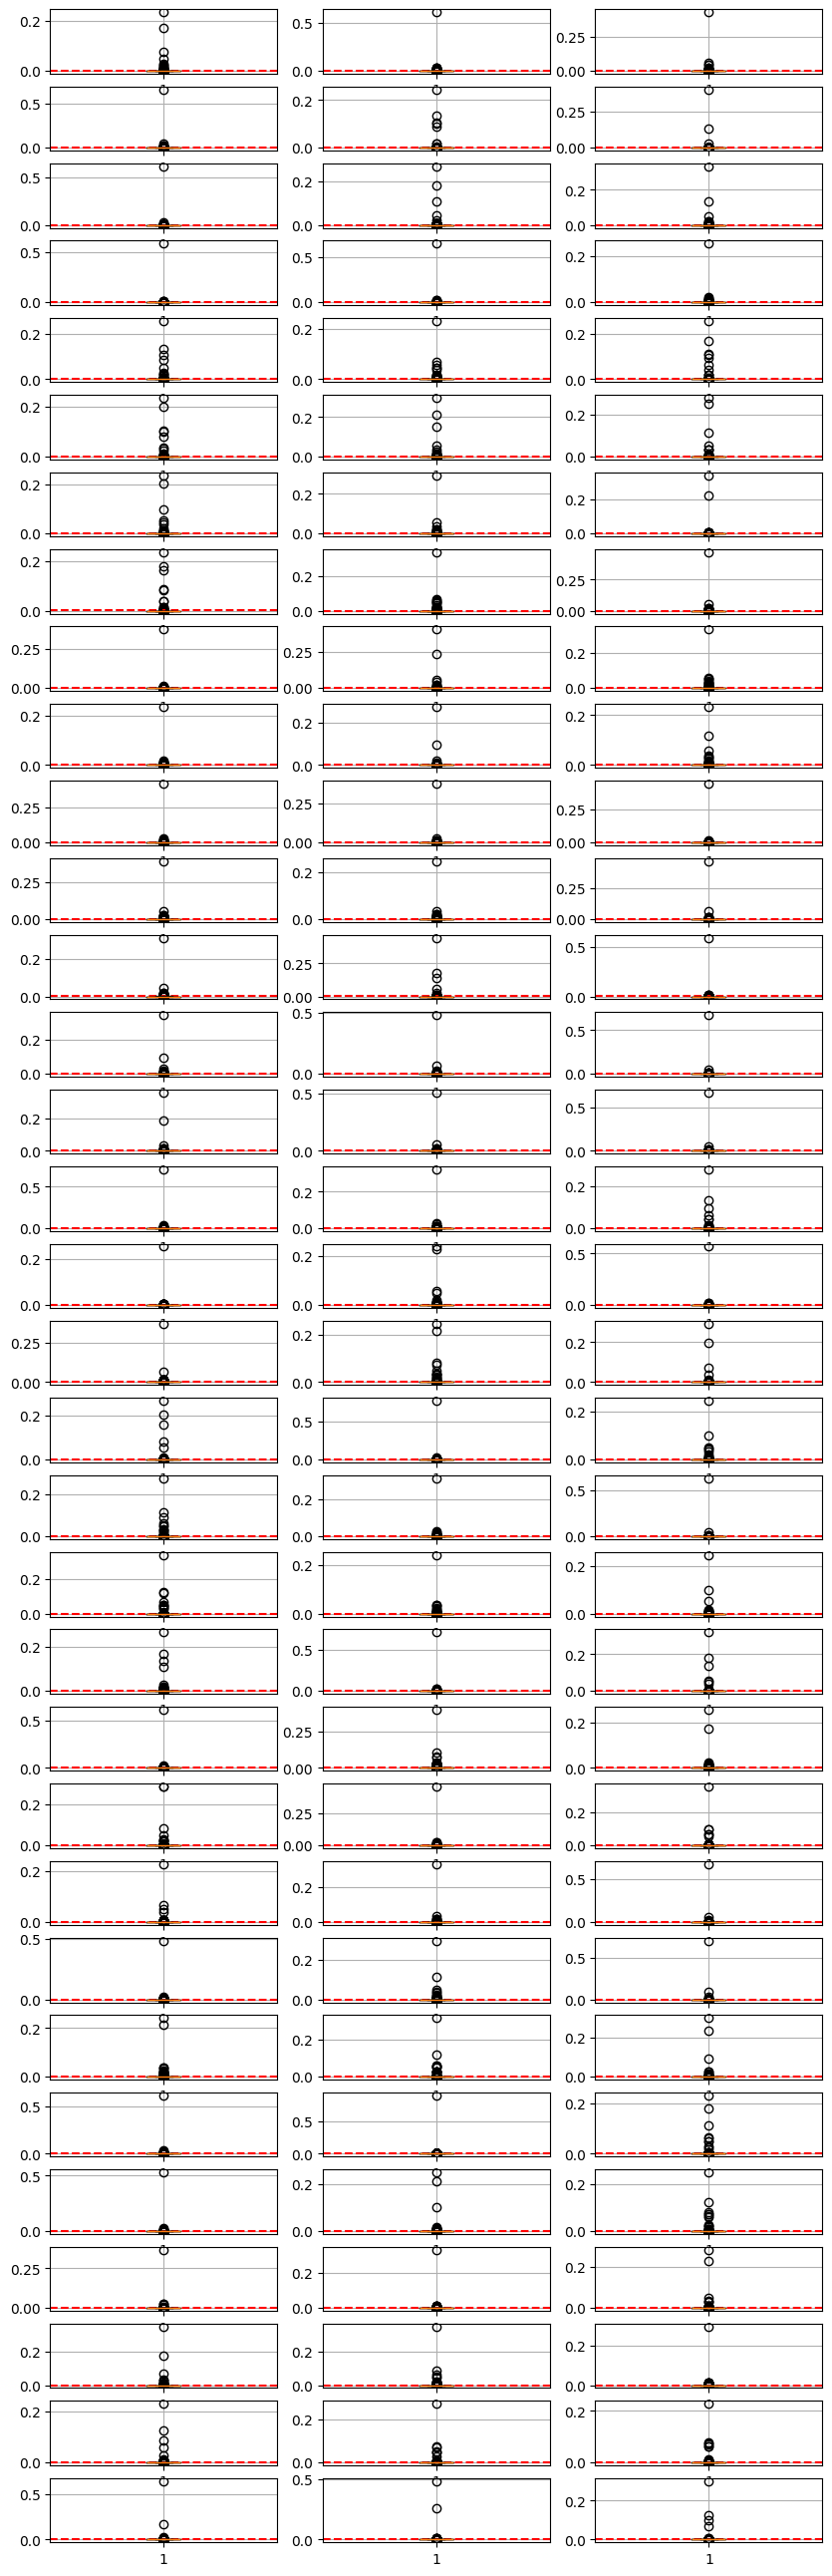

In [ ]:
n_rows = 100  # Adjust the number of rows as needed
n_cols = 3
fig, axes = plt.subplots(n_rows // n_cols, n_cols, figsize=(10, 1 * (n_rows // n_cols)))

c = 0.00033

for j in range(n_rows):
    y_values = data_frame_filtered['confidence'].iloc[j]
    x_values = range(len(y_values))
    
    row = j // n_cols  
    col = j % n_cols   
    
    ax = axes[row, col]  # Get the current subplot
    ax.axhline(y=c, color='red', linestyle='--')
    ax.boxplot(y_values)
    ax.grid()

plt.show()


In [26]:
data_frame_filtered['confidence_above_threshold_count'] = data_frame_filtered['confidence'].apply(lambda x: len([y for y in x if y > 0.2 ]))

In [27]:
data_frame_filtered['confidence_above_threshold_count'].describe()

count    5535.000000
mean        1.281662
std         0.494620
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: confidence_above_threshold_count, dtype: float64

In [28]:
data_frame_filtered_max_1 = data_frame_filtered[data_frame_filtered['confidence_above_threshold_count'] <= 1]

In [29]:
data_frame_filtered_max_1['label'].mean()

813.7357213877813

In [30]:
data_frame_filtered_rest = data_frame_filtered[data_frame_filtered['confidence_above_threshold_count'] > 1]

In [31]:
data_frame_filtered_rest['label'].mean()

523.5876406034806

In [32]:
data_frame_filtered['confidence_above_threshold_count'] = data_frame_filtered['confidence'].apply(lambda x: len([y for y in x if y > 0.3 ]))
print('data frame description',data_frame_filtered['confidence_above_threshold_count'].describe())

data_frame_filtered_max_1 = data_frame_filtered[data_frame_filtered['confidence_above_threshold_count'] <= 1]
print('data frames with confidence peaks less than equal to 1 '+str(data_frame_filtered_max_1['label'].mean()))

data_frame_filtered_rest = data_frame_filtered[data_frame_filtered['confidence_above_threshold_count'] > 1]
print('data frames with confidence peaks greater than 1 '+str(data_frame_filtered_rest['label'].mean()))

data frame description count    5535.000000
mean        0.868835
std         0.549793
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: confidence_above_threshold_count, dtype: float64
data frames with confidence peaks less than equal to 1 786.3865544860033
data frames with confidence peaks greater than 1 273.880040686345


In [33]:
data_frame = data_frame.drop(columns=['confidence','max_confidence'])

In [34]:
data_frame.head(5)  

,features,label
6247,"[2.1496987, 1.308394, 0.7709801, 0.5294595, 0....",10.340202
570623,"[0.6284667, 0.8216022, 2.009181, 0.011934683, ...",14.201746
6857,"[1.501059, 1.3687139, 1.1552372, 0.6321513, -0...",10.340202
259752,"[-0.22698145, 1.1926022, -0.21617213, 0.205560...",14.411846
64198,"[0.21035561, 0.16499779, 0.18985936, -0.375056...",46.353534


In [35]:
data_frame['regression_label'] = data_frame['label'].apply(lambda x: 1/x)

In [36]:
data_frame.head(5)

,features,label,regression_label
6247,"[2.1496987, 1.308394, 0.7709801, 0.5294595, 0....",10.340202,0.096710
570623,"[0.6284667, 0.8216022, 2.009181, 0.011934683, ...",14.201746,0.070414
6857,"[1.501059, 1.3687139, 1.1552372, 0.6321513, -0...",10.340202,0.096710
259752,"[-0.22698145, 1.1926022, -0.21617213, 0.205560...",14.411846,0.069387
64198,"[0.21035561, 0.16499779, 0.18985936, -0.375056...",46.353534,0.021573


In [3]:
from sklearn.linear_model import LinearRegression

In [37]:

model = LinearRegression()
model.fit(data_frame['features'].to_list(), data_frame['regression_label'].to_list())

LinearRegression()

In [38]:
importance = model.coef_

In [39]:
data_frame['features_scaled'] = data_frame['features'].apply(lambda x: x * importance)

In [40]:
data_frame['confidence'] = data_frame['features_scaled'].apply(lambda x: softmax(x))

In [41]:
data_frame['max_confidence'] = data_frame['confidence'].apply(lambda x: np.max(x))

In [42]:
data_frame = data_frame.sort_values(by='max_confidence', ascending=False)

In [43]:
data_frame_filtered = data_frame.iloc[:top_records_count]

In [44]:
data_frame_filtered['label'].mean()

3290.736345040548

In [45]:
data_frame_filtered['label'].describe()

count     5535.000000
mean      3290.736345
std       3512.111934
min          2.039965
25%        784.369386
50%       1967.752856
75%       4321.939517
max      19373.396511
Name: label, dtype: float64

IndexError: index 33 is out of bounds for axis 0 with size 33

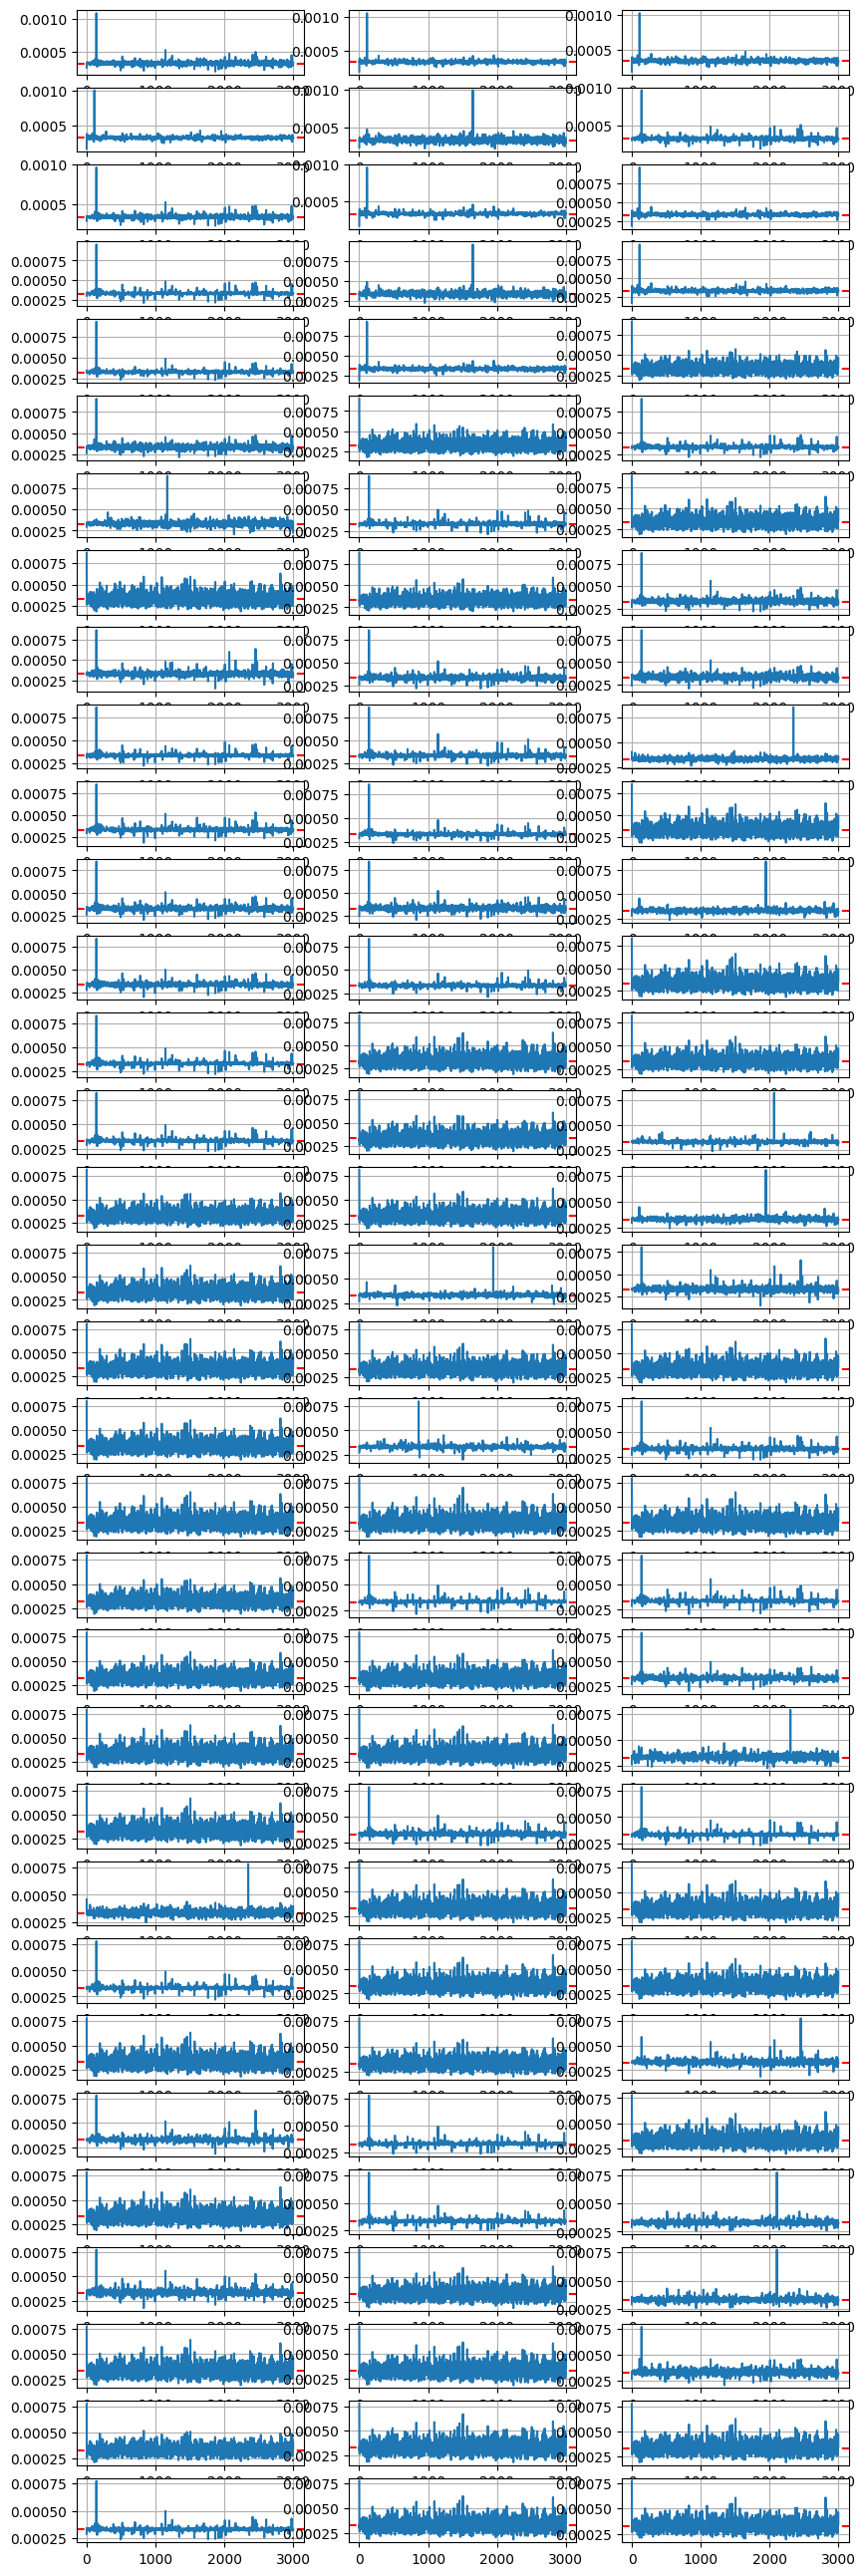

In [ ]:
n_rows = 100  # Adjust the number of rows as needed
n_cols = 3
fig, axes = plt.subplots(n_rows // n_cols, n_cols, figsize=(10, 1 * (n_rows // n_cols)))

c = 0.00033

for j in range(n_rows):
    y_values = data_frame_filtered['confidence'].iloc[j]
    x_values = range(len(y_values))
    
    row = j // n_cols  
    col = j % n_cols   
    
    ax = axes[row, col]  # Get the current subplot
    ax.axhline(y=c, color='red', linestyle='--')
    ax.plot(x_values, y_values)
    ax.grid()

plt.show()

In [ ]:
data_frame.drop(columns=['confidence','max_confidence','features_scaled'], inplace=True)

In [50]:
data_frame.drop(columns=['regression_label'], inplace=True)

In [51]:
data_frame.head(5)

,features,label
326439,"[1.3108406, 6.677922, -0.032848686, 0.17813298...",376.103242
591152,"[3.2585547, 0.62308383, 0.5587694, 1.0605161, ...",49.176251
591119,"[3.6630218, 0.5373129, 0.8081045, 0.9740823, 2...",103.917215
592618,"[3.61214, -0.5102221, 0.3335371, 0.4829599, 2....",86.322857
225707,"[2.0267375, 0.34760585, 0.03925425, 0.5361441,...",19.050950


In [52]:
data_frame['label'].describe()

count    55350.000000
mean      3260.978350
std       4202.391081
min          0.751505
25%        378.965748
50%       1254.280157
75%       4598.103009
max      19791.642460
Name: label, dtype: float64

In [55]:
data_frame = data_frame.sort_values(by='label')
data_frame_filtered = data_frame.iloc[:top_records_count]

In [57]:
data_frame_filtered['label'].mean()

35.72071188296122

In [59]:
data_frame_filtered['confidence'] = data_frame_filtered['features'].apply(lambda x: softmax(x))
data_frame_filtered['max_confidence'] = data_frame_filtered['confidence'].apply(lambda x: np.max(x))
data_frame_filtered['max_confidence'].describe()

/tmp/ipykernel_3402/3799779850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame_filtered['confidence'] = data_frame_filtered['features'].apply(lambda x: softmax(x))
/tmp/ipykernel_3402/3799779850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame_filtered['max_confidence'] = data_frame_filtered['confidence'].apply(lambda x: np.max(x))


count    5535.000000
mean        0.306485
std         0.284825
min         0.003047
25%         0.062261
50%         0.195137
75%         0.499816
max         0.989570
Name: max_confidence, dtype: float64

In [62]:
data_frame_rest = data_frame.iloc[int(len(data_frame)*0.5):]
data_frame_rest['confidence'] = data_frame_rest['features'].apply(lambda x: softmax(x))
data_frame_rest['max_confidence'] = data_frame_rest['confidence'].apply(lambda x: np.max(x))
data_frame_rest['max_confidence'].describe()

/tmp/ipykernel_3402/1791999276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame_rest['confidence'] = data_frame_rest['features'].apply(lambda x: softmax(x))
/tmp/ipykernel_3402/1791999276.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame_rest['max_confidence'] = data_frame_rest['confidence'].apply(lambda x: np.max(x))


count    27675.000000
mean         0.034883
std          0.072399
min          0.001973
25%          0.007529
50%          0.015133
75%          0.030852
max          0.962245
Name: max_confidence, dtype: float64

In [63]:
data_frame_rest = data_frame.iloc[int(len(data_frame)*0.75):]
data_frame_rest['confidence'] = data_frame_rest['features'].apply(lambda x: softmax(x))
data_frame_rest['max_confidence'] = data_frame_rest['confidence'].apply(lambda x: np.max(x))
data_frame_rest['max_confidence'].describe()

/tmp/ipykernel_3402/2119459323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame_rest['confidence'] = data_frame_rest['features'].apply(lambda x: softmax(x))
/tmp/ipykernel_3402/2119459323.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame_rest['max_confidence'] = data_frame_rest['confidence'].apply(lambda x: np.max(x))


count    13838.000000
mean         0.029305
std          0.065560
min          0.001973
25%          0.006210
50%          0.012524
75%          0.024564
max          0.960228
Name: max_confidence, dtype: float64

In [26]:
data_frame['confidence'] = data_frame['features'].apply(lambda x: softmax(x))
data_frame['max_confidence'] = data_frame['confidence'].apply(lambda x: np.max(x))
data_frame = data_frame.sort_values('max_confidence', ascending=False)

data_frame_filtered = data_frame.iloc[:int(len(data_frame)*0.25)]

In [27]:
data_frame_filtered['label'].describe()

count    13837.000000
mean      1177.205777
std       2530.353992
min          2.039965
25%         53.728855
50%        233.893908
75%        864.741911
max      19217.591362
Name: label, dtype: float64

In [18]:
data_frame['max_confidence'] = data_frame['confidence'].apply(lambda x: np.max(x))
data_frame_filtered['one_hot_confidence'] = data_frame_filtered['confidence'].apply(lambda x: [1 if y > 0.2 else 0 for y in x])

/tmp/ipykernel_5122/1375278592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame_filtered['one_hot_confidence'] = data_frame_filtered['confidence'].apply(lambda x: [1 if y > 0.2 else 0 for y in x])


In [19]:
data_frame_filtered.head(5)

,features,label,confidence,max_confidence,one_hot_confidence
6247,"[2.1496987, 1.308394, 0.7709801, 0.5294595, 0....",10.340202,"[7.32623e-06, 3.1586867e-06, 1.8454843e-06, 1....",0.989570,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
570623,"[0.6284667, 0.8216022, 2.009181, 0.011934683, ...",14.201746,"[1.2205189e-06, 1.4805465e-06, 4.85491e-06, 6....",0.989406,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6857,"[1.501059, 1.3687139, 1.1552372, 0.6321513, -0...",10.340202,"[4.995805e-06, 4.376517e-06, 3.535222e-06, 2.0...",0.988090,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
259752,"[-0.22698145, 1.1926022, -0.21617213, 0.205560...",14.411846,"[9.356414e-07, 3.8692488e-06, 9.4580963e-07, 1...",0.987886,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
64198,"[0.21035561, 0.16499779, 0.18985936, -0.375056...",46.353534,"[5.908857e-06, 5.6468316e-06, 5.7889793e-06, 3...",0.986848,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [20]:
data_frame_p = data_frame_filtered[['one_hot_confidence','label']]

In [21]:
data_frame_p['scaled_label'] = 1/data_frame_p['label']

/tmp/ipykernel_5122/1802508958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame_p['scaled_label'] = 1/data_frame_p['label']


In [23]:
model = LinearRegression()
model.fit(data_frame_p['one_hot_confidence'].to_list(), data_frame_p['scaled_label'].to_list())
importance = model.coef_

In [24]:
data_frame_filtered['features_scaled'] = data_frame_filtered['features'].apply(lambda x: x * importance)
data_frame_filtered['confidence'] = data_frame_filtered['features_scaled'].apply(lambda x: softmax(x))
data_frame_filtered['max_confidence'] = data_frame_filtered['confidence'].apply(lambda x: np.max(x))
data_frame_filtered = data_frame_filtered.sort_values('max_confidence', ascending=False).iloc[:int(len(data_frame)*0.1)]
data_frame_filtered['label'].mean()

/tmp/ipykernel_5122/4139653072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame_filtered['features_scaled'] = data_frame_filtered['features'].apply(lambda x: x * importance)
/tmp/ipykernel_5122/4139653072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame_filtered['confidence'] = data_frame_filtered['features_scaled'].apply(lambda x: softmax(x))
/tmp/ipykernel_5122/4139653072.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

1506.8110864293442

In [25]:
data_frame_filtered['label'].describe()

count     5535.000000
mean      1506.811086
std       2716.432516
min          2.039965
25%        135.388430
50%        458.165044
75%       1307.927279
max      19217.591362
Name: label, dtype: float64